

# Project: Investigate the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: "The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

> The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

> The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year."

> **Questions to explore**: 
><ul>
><li><a href="#q1"> 1. The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010?</a></li>
><li><a href="#q2"> 2. In which state did asian alone buy minmum number of guns in terms of percent ( >0 ), July 1, 2016?</a></li> 
><li><a href="#q3"> 3. What is the total annual payroll of all the states ($, 1000) in 2015?</a></li>
><li><a href="#q4"> 4. What is the average revenue of firms of all the states in 2012?</a></li> 
><li><a href="#q5"> 5. What census data is most associated with high gun per capita?</a></li>
><li><a href="#q6"> 6. Which states have had the highest growth in gun registrations?</a></li>
><li><a href="#q7"> 7. What is the overall trend of gun purchases?</a></li>
><li><a href="#q8"> 8. How many guns were registered in total in January?</a></li>
><li><a href="#q9"> 9. How many guns were registered in total in September, 2003?</a></li>
><li><a href="#q10"> 10. What type of gun has highest quantity, and the relationship to totals?</a></li>
><li><a href="#q11"> 11. What is the sum of registered gun in each state over time?</a></li>




In [32]:
# Set up import statements for all of the packages that are planed to use;
# Include a 'magic word' so that visualizations are plotted;
# call on dataframe to display the first 5 rows.

import pandas as pd
import numpy as np
import datetime
from statistics import mode
% matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('U.S. Census Data.csv', sep =',')

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [33]:
# Load data and print out a few lines

df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [34]:
# Reading an Excel file in python using pandas
# call on dataframe to display the first 5 rows

xl = pd.ExcelFile('gun_data.xlsx')
 
xl.sheet_names
[u'Sheet1']

df1 = xl.parse("Sheet1")
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [35]:
# return a tuple of the dimensions of the dataframe.

df.shape, df1.shape

((85, 52), (12485, 27))

In [36]:
# print the column labels in the dataframe.

for i, v in enumerate(df.columns):
    print(i, v)
    

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


In [37]:
for i, v in enumerate(df1.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [38]:
# return the datatypes of the columns.

df.dtypes 

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [39]:
df1.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [40]:
# check for duplicates in the data.

sum(df.duplicated())

3

In [41]:
# check for duplicates in the data.

sum(df1.duplicated())

0

In [42]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(True, 52)

In [43]:
# check NaN exist in which column

df.isnull().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [44]:
df1.isnull().any().any(), sum(df1.isnull().any())

(True, 23)

In [45]:
df1.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [46]:
# displays a concise summary of the dataframe;
# including the number of non-null values in each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [48]:
# Generates descriptive statistics, excluding NaN values.

df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,1,(c),16.10%,7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,4101,0.048,50.40%,2.50%,"625,741",0.50%,"2,668,912",1.50%,85.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [49]:
df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### Data Cleaning 

In [50]:
# drop duplicates
# Confirm changes

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [51]:
df1.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [52]:
# Change column name in df1 into lower case for the convenience of analysis
# Confirm changes

df.rename(columns = lambda x: x.lower(), inplace = True)
df.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [53]:
# As the NaN values are of string type therefore thty can't treated by filling with means 
# since they don't affect the arithmetic calculation nor satistical analysis
# so it is better to replace those NaN values with a common string type value which doesn't indicate anything
# For the numerical type of NaN, as each row has specific meaning, thus we can't fill them with mean

# As for df, numericial type of data was mispresented as string type, thus first task is to convert them into float
# Skip the first 2 columns as they should be string type, so leave them unchanged

col = df.iloc[:,2:].columns
for c in col:
    df[c] = df[c].str.extract('(\d+)').astype(float)
    
# comfirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
fact              80 non-null object
fact note         28 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

/Users/shilinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  # This is added back by InteractiveShellApp.init_path()


In [54]:
# Replace the all NaN in df with 'No Record' 

df.fillna('No record', inplace = True)

# Confirm changes 

df.isnull().any()

fact              False
fact note         False
alabama           False
alaska            False
arizona           False
arkansas          False
california        False
colorado          False
connecticut       False
delaware          False
florida           False
georgia           False
hawaii            False
idaho             False
illinois          False
indiana           False
iowa              False
kansas            False
kentucky          False
louisiana         False
maine             False
maryland          False
massachusetts     False
michigan          False
minnesota         False
mississippi       False
missouri          False
montana           False
nebraska          False
nevada            False
new hampshire     False
new jersey        False
new mexico        False
new york          False
north carolina    False
north dakota      False
ohio              False
oklahoma          False
oregon            False
pennsylvania      False
rhode island      False
south carolina  

In [55]:

col1 = df1.iloc[:,np.r_[2:7, 8:26]].columns
for c in col1:
    c_mean = df1[c].mean()
    df1[c].fillna(c_mean, inplace = True)
    
# Confirm changes

df1.isnull().any()


month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [56]:
# Convert string into datatime format in df1

df1.month = pd.to_datetime(df1['month'], errors='coerce')

# Confirm changes

df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Research Question 1: The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010?

In [57]:
# Find out which state had such max value

df.iloc[7, 2:].idxmax(axis = 1)

'utah'

In [58]:
# Print out the exact number

df.iloc[7, 2:].loc['utah']

31.0

> Utah state had highest purchages record for persons under 18 years, percent on April 1, 2010, and the percent is 31.

<a id='q2'></a>
### Research Question 2: In which state did asian alone buy minmum number of guns in terms of percent ( >0 ), July 1, 2016?

In [59]:
# select the target state 

asi_jul_16 = df.iloc[15, 2:]

# select the state whose total annual payroll is above 0

for t in asi_jul_16.index:
    if asi_jul_16.loc[t] == 0:
        asi_jul_16.drop([t], inplace = True)

# Print out the index of which had the minimum value

asi_jul_16.idxmin()



'alabama'

In [60]:
# Print out the exact number

asi_jul_16.loc['alabama']

1.0

> In alabama state, asian alone bought the minimum number of gun in terms of percent, which is 1%.

<a id='q3'></a>
### Research Question 3:  What is the total annual payroll of all the states ($, 1000) in 2015？

In [61]:
df.iloc[52, 2:].sum()

1531393139.0

> The total annual payroll of att states in 2015 is 1531393139 ($, 1000).

<a id='q4'></a>
### Research Question 4: What is the average revenue of firms of all the states in 2012?

In [62]:
df.iloc[55, 2:].mean()

133749.26000000001

> The average revenue of firms of all the states in 2012 is around 133749.26 dollor.

<a id='q5'></a>
### Research Question 5: What census data is most associated with high gun per capita?

In [63]:
# Synchronize both dataframe at 2010

state_df1 = df1.query('month == "2010-04-01"').state.str.lower().tolist()
state_df = df.iloc[3, 2:].index.tolist()


In [64]:
# Compare the element difference in column of 'state'

miss_state = []
def miss_states(state):
    for s in state:
        if s not in state_df:
               miss_state.append(s)
    return miss_state

miss_states(state_df1)


['district of columbia',
 'guam',
 'mariana islands',
 'puerto rico',
 'virgin islands']

In [65]:
# Convert all vaules in column of'state' from df1 in lower case in order to match
# the format in column of 'state' from df for later calculatation
# Confirm changes

df1['state'] = df1.state.str.lower()

In [66]:
# Use query to select common elements in columns of 'state' from both dataframe

gun_tot_2010 = df1.query('month == "2010-04-01" & state != @miss_state')

In [67]:
# Use assertation function to confirm 'state' columns' elements from both dataframe are idental 

assert(gun_tot_2010.state.tolist() == df.iloc[3, 2:].index.tolist())

In [68]:
# Set index to be state in order to do arithmetic calculation

gun_tot_2010.set_index('state', inplace = True)


In [69]:
# Calcluate the high gun per capita

avg_2010 = gun_tot_2010.totals/df.iloc[3, 2:]

In [70]:
# Find out the index which points to the highest value

avg_2010.idxmax()

'utah'

In [71]:
# Print out the value

avg_2010.loc['utah']


54695.5

> The highest gun per capita was 54695.5, that occurred at utah in 2010.

In [72]:
# Same for 2016
# Synchronize both dataframe at 2016

state_df1_2016 = df1.query('month == "2016-07-01"').state.str.lower().tolist()
state_df_2016 = df.iloc[0, 2:].index.tolist()



In [73]:
# Compare the element difference in columns of 'state'

miss_state_2016 = []
def miss_states(state):
    for s in state:
        if s not in state_df_2016:
               miss_state_2016.append(s)
    return miss_state_2016

miss_states(state_df1_2016)

['district of columbia',
 'guam',
 'mariana islands',
 'puerto rico',
 'virgin islands']

In [74]:
# Use query to select common elements in columns of 'state' from both dataframe

gun_tot_2016 = df1.query('month == "2016-07-01" & state != @miss_state')

In [75]:
# Use assertation function to confirm 'state' column's elements from both dataframe are idental 

assert(gun_tot_2016.state.tolist() == df.iloc[0, 2:].index.tolist())

In [76]:
# Set index to be state in order to do arithmetic calculation

gun_tot_2016.set_index('state', inplace = True)

In [77]:
# Calcluate the high gun per capita

avg_2016 = gun_tot_2016.totals/df.iloc[0, 2:]

In [78]:
# Find out the index which points to the highest value

avg_2016.idxmax()

'kentucky'

In [79]:
# Print out the value

avg_2010.loc['kentucky']

52815.25

> The highest gun per capita was 52815.25, that occurred at 'kentucky' in 2016.

<a id='q6'></a>
### Research Question 6: Which states have had the highest growth in gun registrations?

In [80]:
# Groupby time, state and sum of totals

gun_alltime = df1.groupby(['month', 'state'])['totals'].sum()



In [81]:
# Find out the earliest and latest registration date

cur_date = df1['month'].max()
ear_date = df1['month'].min()

In [82]:
# The amount of registed guns from lastest substract the earliest

gun_grow_tot = gun_alltime.loc[cur_date] - gun_alltime.loc[ear_date]

# Find out the index of maximum value

gun_grow_tot.idxmax()

'kentucky'

In [83]:
# Print out the exact numbers

gun_grow_tot.loc['kentucky']

397866

> 'kentucky' have had the highest growth in gun registrations over time, and the total registed number of guns is 397866 to date.

<a id='q7'></a>
### Research Question 7: What is the overall trend of gun purchases?

/Users/shilinli/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


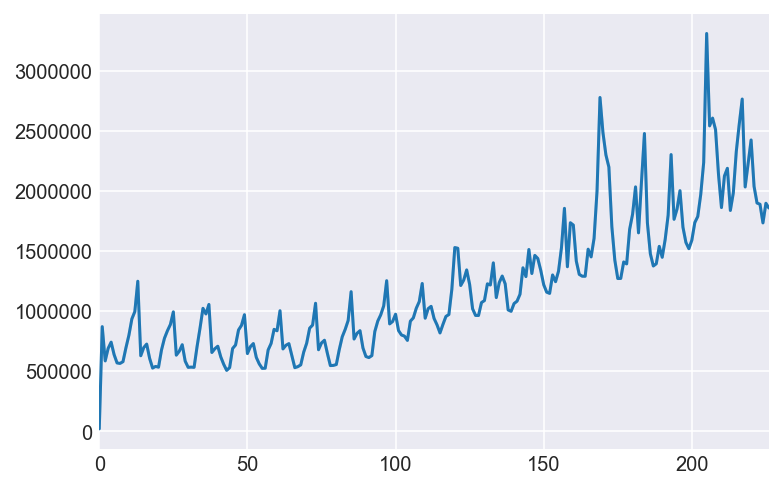

In [84]:
# Groupby time and sum of totals
# This function is intended to be used with data where observations are 
# nested within sampling units that were measured at multiple timepoints

gun_trend = df1.groupby(['month'])['totals'].sum()

ax = sns.tsplot(data = gun_trend, err_style="unit_traces");

> The overall trend is increasing, the speed is becoming faster over time.

<a id='q8'></a>
### Research Question 8: How many guns were registered in total in January?

In [85]:
# Extract month from datetime column (month)
# Copy the dataframe and add a new column with this newly generated month 

month_data = df1.month.dt.strftime("%B")

df_test = df1.copy()

df_test['registed_month']= month_data

In [86]:
# Find all the rows in January and February and sum the totals
# Use substration to find the answer

feb_gun = df_test.query('registed_month == "February"')
jan_gun = df_test.query('registed_month == "January"')
feb_gun.totals.sum() - jan_gun.totals.sum()

1792105

> The total registered guns in January was 1792105 pieces.

<a id='q9'></a>
### Research Question 9: How many guns were registered in total in September, 2003?

In [87]:
# Census were recorded on every 1st day of each month
# Target the desired date
# Find out the number

tot_oct01_03 = df1.query('month == "2003-10-01"')
tot_sep01_03 = df1.query('month == "2003-09-01"')
tot_oct01_03.groupby(['month'])['totals'].sum().tolist()[0] - \
tot_sep01_03.groupby(['month'])['totals'].sum().tolist()[0]


117064

> The total registed guns in September of 2003 were 117064 pieces.

<a id='q10'></a>
### Research Question 10: What type of gun has highest quantity, and the relationship to totals?

In [88]:
gun_type = {}
col_state = df1.columns[2:25]

for c in col_state:
    gun_type[c] = df1[c].sum()
    
max(gun_type, key=gun_type.get)

'long_gun'

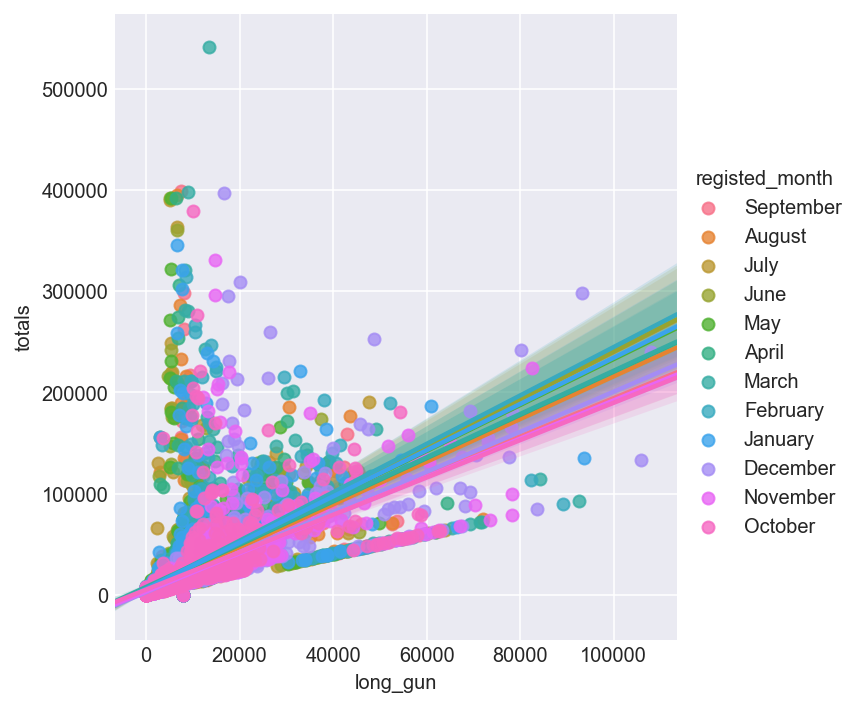

In [89]:
sns.lmplot(x = 'long_gun', y = 'totals', hue = 'registed_month', data = df_test);

> Long gun is highest registed type of gun in number among the others, it is positively correlated with totals. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='q11'></a>
### Research Question 11: What is the sum of registered gun in each state over time?

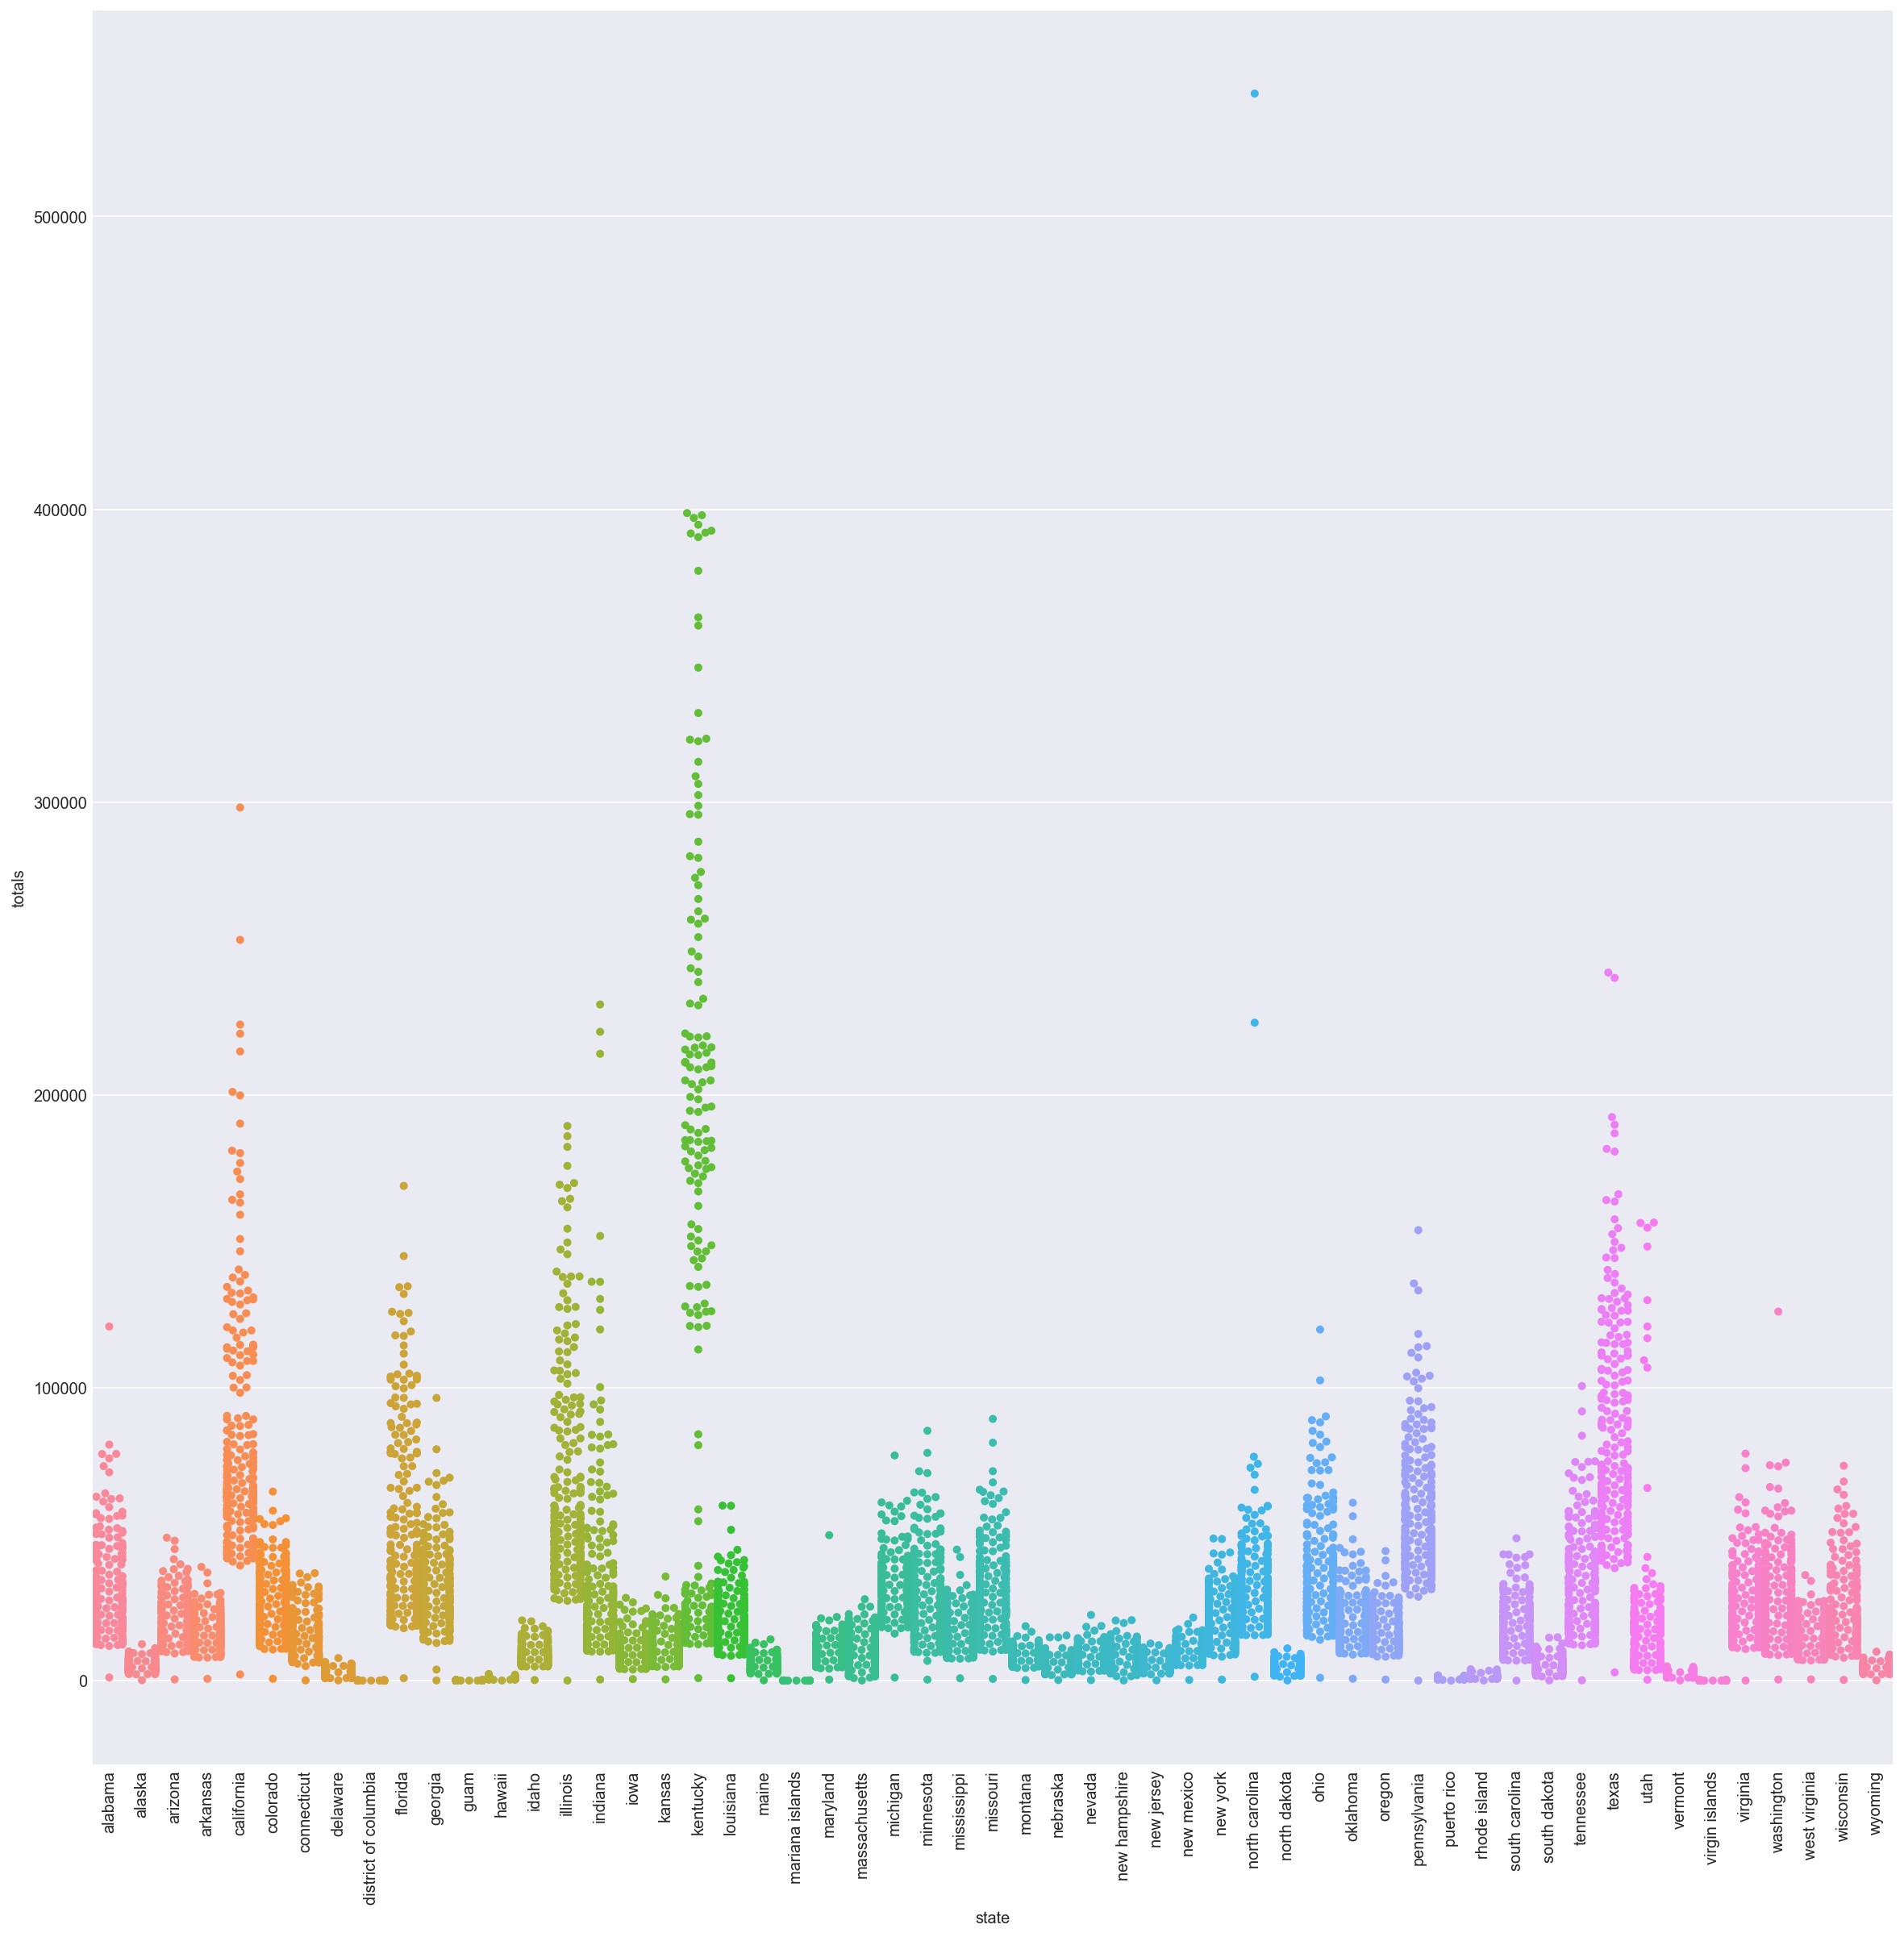

In [90]:
plt.subplots(figsize=(20,20))
plt.xticks(rotation=90);
sns.swarmplot(x='state', y='totals', data=df1);

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The dataset included 2 tables, but they have to be loaded by different measures. The data was ranging from 1998 to 2017, which consisted of detailed information of registered gun. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis. 

> The limitations of current study were obvious as well, data was seperated into two tables which could affect the process  of analysis. On the other hand, the population estimation were only recorded for 2010 and 2016, which limit some analysis to a small range, same for many other parameters, such as "Foreign born persons, percent", "Veterans, 2011-2015", etc.




In [92]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_FBI_Gun_Dataset_20180108.ipynb'])

0